In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pattern_test_results.csv')

In [3]:
df

,age,physical_score,test_result
0,52.0,31.3,1
1,48.0,37.4,1
2,57.0,19.8,0
3,50.0,19.7,0
4,52.0,36.0,1
...,...,...,...
4995,63.0,23.5,0
4996,59.0,21.6,0
4997,48.0,25.7,1
4998,65.0,18.4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.corr()['test_result']

age              -0.017617
physical_score    0.584566
test_result       1.000000
Name: test_result, dtype: float64

In [6]:
X = df.drop('test_result' , axis=1)
y = df['test_result']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier()

In [41]:
params = {
    'criterion':["gini", "entropy"],
    # 'splitter':["best", "random"],
    'max_depth':[2, 4],
    'min_samples_split':[3, 4],
    'min_samples_leaf':[2, 3],
    'min_weight_fraction_leaf':[0.0, 1.0],
    'max_features':["sqrt", "log2"],
    'random_state':[None, 2],
    # 'max_leaf_nodes':[None, 2],
    # 'min_impurity_decrease':[0.0, 3.0],
    # 'class_weight':[None, 2.0],
    # 'ccp_alpha':[0.0, 2.5]
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
full_model = GridSearchCV(model , params , cv = 5 , verbose=2)

In [44]:
full_model.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=None; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=None; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=None; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=None; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, random_state=None; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, min_weigh

/home/marshal/Desktop/ML/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/home/marshal/Desktop/ML/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/marshal/Desktop/ML/venv/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/marshal/Desktop/ML/venv/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_paramet

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4],
                         'min_weight_fraction_leaf': [0.0, 1.0],
                         'random_state': [None, 2]},
             verbose=2)

In [45]:
y_pred = full_model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , accuracy_score,  precision_score

In [47]:
df['test_result'].value_counts()

test_result
1    2934
0    2066
Name: count, dtype: int64

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       500
           1       0.85      0.89      0.87       750

    accuracy                           0.84      1250
   macro avg       0.83      0.82      0.83      1250
weighted avg       0.84      0.84      0.83      1250



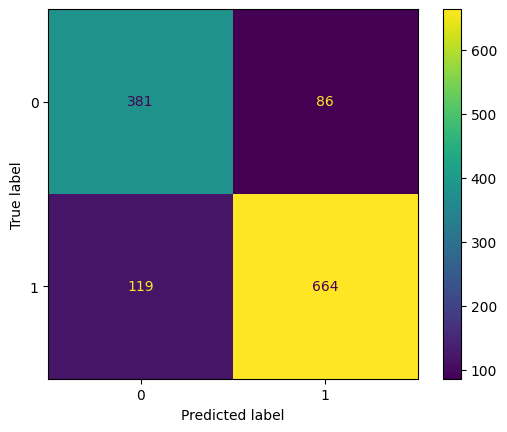

In [49]:
ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()

In [52]:
accuracy_score(y_pred, y_test)

0.836

In [51]:
full_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None}

In [59]:
new_data = [[44, 37]]

In [63]:
new_data = scaler.fit_transform(new_data)

In [64]:
new_data = np.array(new_data)

In [65]:
a = full_model.predict(new_data)

In [66]:
a

array([1])